# Policy Gradient Methods
There are two major objectives 
1. Find a good policy (softmax, kernel, neural network parameterized policy)
2. Optimize a performance objective (typically the expected cumulative reward $G_t$) by stochastic gradient ascent with respect to the policy parameters.

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import copy 

In [2]:
#Hyperparameters
NUM_EPISODES = 10000
LEARNING_RATE = 0.000025 # controls the rate or speed at which the model learns (step)
GAMMA = 0.99 #discount factor, setting high for future reward.

# Create gym and seed numpy
env = gym.make('CartPole-v0')
nA = env.action_space.n # number of possible moves
np.random.seed(1)

# Init weight (random)
w = np.random.rand(4, 2)  #total discount reward function

# Keep stats for final print of graph
episode_rewards = []

In [3]:
# Our policy that maps state to action parameterized by w 
def policy(state,w):
    z = state.dot(w)
    exp = np.exp(z)
    return exp/np.sum(exp)

In [4]:
# Vectorized softmax Jacobian
def softmax_grad(softmax):
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

## Training Loop
for each eposode:

&nbsp; for each action:
        1. Make action according to policy
        2. Calculate the gradient of policy
&nbsp; update w(total discount reward)

## Softmax function: 

The softmax function takes an N-dimensional vector of arbitrary real values and produces another N-dimensional vector with real values in the range (0, 1) that add up to 1.0. (Time homogeneous?)

$Softmax(s)=\frac{e^{s*w}}{\sum e^{s*w}}$



$w = \sum_{t} \alpha*\triangledown log(Softmax(s_t))*V_t$

In [5]:
# Main loop 
# Make sure you update your weights AFTER each episode
for e in range(NUM_EPISODES):
    
    state = env.reset()[None,:]
    grads = [] # Gradient
    rewards = [] 
    
    # Keep track of game score to print
    score = 0
    
    # Each Episodes
    while True:
        
        # Uncomment to see your model train in real time (slower)
        #env.render()
        
        # Sample from policy and take action in environment
        probs = policy(state,w) 
        action = np.random.choice(nA,p=probs[0]) 
        next_state,reward,done,_ = env.step(action) 
        next_state = next_state[None,:] 

        # Compute gradient and save with reward in memory for our weight updates
        dsoftmax = softmax_grad(probs)[action,:]
        dlog = dsoftmax / probs[0,action]
        grad = state.T.dot(dlog[None,:])

        grads.append(grad)
        rewards.append(reward)
        
        score+=reward

        # Dont forget to update your old state to the new state
        state = next_state
        
        if done:
            break

    # Weight update
    for i in range(len(grads)):
        
        # Loop through everything that happend in the episode and update towards the log policy gradient times **FUTURE** reward
        w += LEARNING_RATE * grads[i] * sum([ r * (GAMMA ** t) for t,r in enumerate(rewards[i:])])
        

    # Append for logging and print
    episode_rewards.append(score) 
    print("EP: " + str(e) + " Score: " + str(score) + "         ",end="\r", flush=False) 


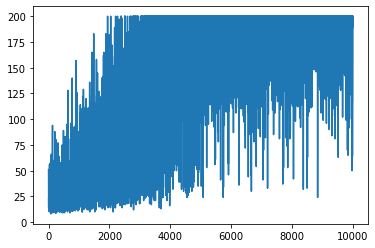

In [7]:
plt.plot(np.arange(NUM_EPISODES),episode_rewards)
plt.show()
env.close()

In [6]:
import pandas as pd
df = pd.DataFrame(episode_rewards) 
df.to_csv('PG.csv') 

Alternative plot